# About
MLOps is quite important for the systematic management of ML/AI experiments. 

In this notebook, I demostrate how to use ClearMl to record experiments using scikit-learn. There are other similar products like WandB and I choose ClearML given it's open source and has been used in my projects. 

You need to do the following in terminal to setup ClearML before running this notebook:

- install the package `pip install clearml`
- Connect your computer to the server by creating credentials at [https://app.community.clear.ml/profile](https://app.community.clear.ml/profile)
- run `clearml-init` and follow the setup instructions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn')

In [2]:
# read csv data into pandas dataframe
df = pd.read_csv('titanic.csv')
# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

ClearML Task: created new task id=884f63404ee649d88aca34a02aff7d0f
2021-07-11 13:45:07,402 - clearml.Task - WARNING - Failed auto-detecting task repository: Script file [PosixPath('/Users/harrywang/sandbox/mini-data-science/ipykernel_launcher'), PosixPath('/Users/harrywang/sandbox/mini-data-science/<ipython-input-3-6bf5980eef98>')] could not be found
ClearML results page: https://app.community.clear.ml/projects/0f250cfc7fd94067b9ed97580c252303/experiments/884f63404ee649d88aca34a02aff7d0f/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
Final Accuracy Score : 0.8100558659217877


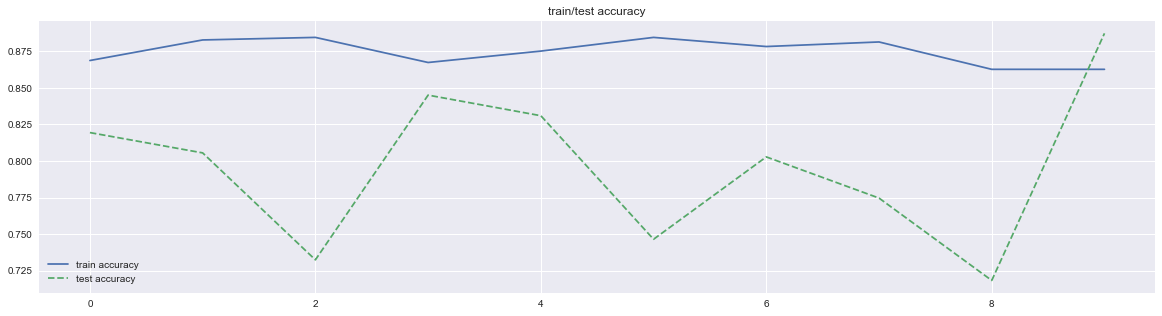

In [3]:
# a task is an experiment
from clearml import Task
task1 = Task.init(project_name='mini machine learning tutorial', task_name='Decision Tree')
configuration_dict = {
    'test_size': 0.2,
    'split_random_state': 42,
    'criterion': 'entropy',
    'max_depth': 7,
    }

configuration_dict = task1.connect(configuration_dict)  # enabling configuration override by clearml

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=configuration_dict.get('test_size'), 
    random_state=configuration_dict.get('split_random_state'),
)

# log table to ClearML
logger = task1.get_logger()
logger.report_table(title='Train Dataset', series='first 10 lines', iteration=1, table_plot=X_train.head(10))
logger.report_table(title='Test Dataset', series='first 10 lines', iteration=1, table_plot=X_test.head(10))

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import joblib

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ]
)

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier(
            criterion=configuration_dict.get('criterion'),
            max_depth=configuration_dict.get('max_depth')),
            ),
    ]
)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_scores_dt = cross_validate(pipeline_dt, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(cv_scores_dt['train_accuracy'], '-', label='train accuracy')
ax.plot(cv_scores_dt['test_accuracy'], '--', label='test accuracy')
ax.set_title('train/test accuracy')
ax.legend()

logger.report_matplotlib_figure('train/test accuracy', '', fig, iteration=1)

model_dt = pipeline_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

print(f'Final Accuracy Score : {accuracy_score(y_test, y_pred)}')

joblib.dump(model_dt, 'model_dt.pkl', compress=True)

task1.close()

ClearML Task: created new task id=13639e7ff23e4aa3a4593c17e1812380
2021-07-11 13:45:28,510 - clearml.Task - WARNING - Failed auto-detecting task repository: Script file [PosixPath('/Users/harrywang/sandbox/mini-data-science/ipykernel_launcher'), PosixPath('/Users/harrywang/sandbox/mini-data-science/<ipython-input-4-db2938a3cc61>')] could not be found
ClearML results page: https://app.community.clear.ml/projects/0f250cfc7fd94067b9ed97580c252303/experiments/13639e7ff23e4aa3a4593c17e1812380/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
Final Accuracy Score : 0.8156424581005587


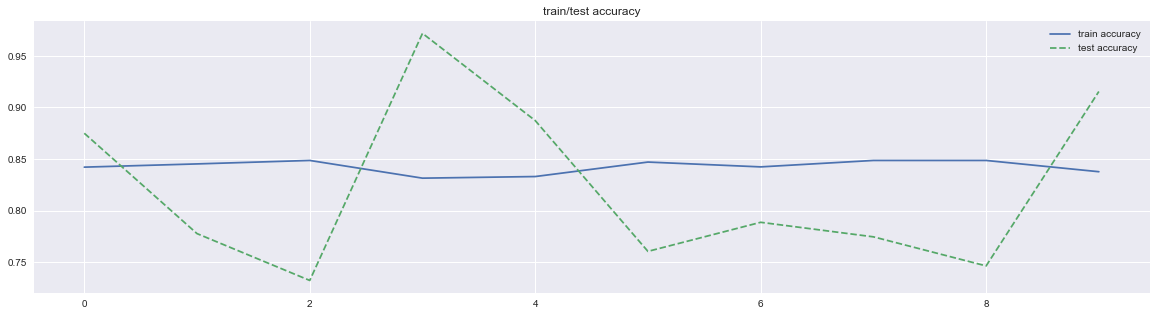

In [4]:
# a task is an experiment
from clearml import Task
task2 = Task.init(project_name='mini machine learning tutorial', task_name='Support Vector Machine')
configuration_dict = {
    'test_size': 0.2,
    'split_random_state': 42,
    }

configuration_dict = task2.connect(configuration_dict)  # enabling configuration override by clearml

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=configuration_dict.get('test_size'), 
    random_state=configuration_dict.get('split_random_state'),
)

# log table to ClearML
logger = task2.get_logger()
logger.report_table(title='Train Dataset', series='first 10 lines', iteration=1, table_plot=X_train.head(10))
logger.report_table(title='Test Dataset', series='first 10 lines', iteration=1, table_plot=X_test.head(10))

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import joblib

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ]
)

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_svc = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_svc', SVC()),
    ]
)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_scores_svc = cross_validate(pipeline_svc, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(cv_scores_svc['train_accuracy'], '-', label='train accuracy')
ax.plot(cv_scores_svc['test_accuracy'], '--', label='test accuracy')
ax.set_title('train/test accuracy')
ax.legend()

logger.report_matplotlib_figure('train/test accuracy', '', fig, iteration=1)

model_svc = pipeline_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)

print(f'Final Accuracy Score : {accuracy_score(y_test, y_pred)}')

joblib.dump(model_svc, 'model_svc.pkl', compress=True)

task2.close()